# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
"""
Importing required libraries for model and dataset
"""
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
"""
Loading the dataset and splitting into training and test sets.
"""
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


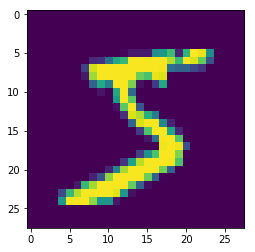

In [0]:
"""
checking size of training set and importing matplotlib library.
%matplotlib inline is used to plot all the images in the same notebook and we plot a sample image
"""
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
"""
the training and test set are in shape (size,img_height,img_widht).
we reshape it beause our network will take in (img_height,img_width,number_of_channels)
we have only one channel in all the images.
"""
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
"""
all the training and test pixels are integer values and we are converting into float.
we also normalize all the pixel values by dividing by maximum value of pixel (0-255).
"""
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
"""
The output is in one dimension. So we convert it into 10 classes using the categorical function.
the categorical function takes in input as an array and converts into a n dimension matrix where n in the unique values 
present in the one dimension feature

"""
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D
"""
first we create a sequential model. Sequential model is simply a sequence model of layers stacked one over other in sequential manner.
while adding the first layer, we always give the input shape and consecutive layers will automatically detect the input shape from the previous layers.

we add 32 filters and kernel size of 3x3 and default stride of 1 by 1. we also adding relu activation function so that we only want +ve values to go to next layers.
this was our first layer.

we do this to make new layers.. but the only parameter that changes is the #kernels. 

in max pooling layer, we define the pool_size which is the size of pool which will move over the input image. Max pool is a down sampling technique and it allows 
assumptions to be made about the ouput of a particular layer.

similarly we add more layers.

Next we have flatten function. flattening a tensor is like removing or converging all its input dimensions into one dimension. it will produce a single tensor dimension
instead of multiple dimension tensor.

we apply softmax function as it enhances our output accuracy. 

we print the summary of the model just build at the end.
"""
model = Sequential() 
#input to 1st layer : 28x28x1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#output of layer 1 : 26x26x32 
#receptive field after 1st layer : 3x3

#input to 2nd layer : 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu'))
#output of layer 2 : (3x3x32)x64 = 24x24x64
#receptive field after 2nd layer : 5x5

#input to 3rd layer : 24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu'))
#output of layer 3 : (3x3x64)x128 = 22x22x128
#receptive field after 3rd layer : 7x7

#input to max pool layer : 22x22x128
model.add(MaxPooling2D(pool_size=(2, 2)))
#output of maxpool layer : 11x11x128
#receptive field after max pool(it doubles the receptive field) is: 14x14

#input to 4th layer : 11x11x128
model.add(Convolution2D(256, 3, 3, activation='relu'))
#output of layer 4 : (3x3x128)x256 = 9x9x256
#receptive field after 4th layer : 16x16

#input to 5th layer : 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))
#output of layer 5 : (3x3x256)x512 = 7x7x512
#receptive field after 5th layer : 18x18

#input to 6th layer : 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#output of layer 6 : (3x3x512)x1024 = 5x5x1024
#receptive field after 6th layer : 20x20

#input to 7th layer : 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#output of layer 7 : (3x3x1024)x2048 = 3x3x2048
#receptive field after 7th layer : 22x22

#input to 8th layer : 3x3x2048
model.add(Convolution2D(10, 3, 3, activation='relu'))
#output of layer 8 : (3x3x2048)x10 = 1x1x10
#receptive field after 8th layer : 24x24

#input to flatten layer : 1x1x10
model.add(Flatten())
#output : Nonex10

model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
"""
model.compile helps in configuring the training. it has arguments such as loss functions to be used, which optimizers and evalution metrics.
"""
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
"""
fitting or training the model using x_train as the training the data and y_train is the corresponding target data.
batch size is the total number of images the architecture is passed to.
One epoch is running over all the training images completely. so we run 10 of them.
vdrbose is just for output display setting.
"""
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.3048 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 111s 2ms/step - loss: 2.3026 - a

In [0]:
"""
evaluating model's performance against the validation/test data and calculating the score.
"""
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
"""
predicting the test image labels using the trained model.
"""
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


## Possible reason(s) for such low performance:
1. Since the image size is very small, it is expected to have less number of layers compared to what it currently have. (not more than 6 would be apt but the architecture has 8 layers which are bit too much for such small image)

2. The architecture defined is a very wide network architecture. Wide network architecture is useful in training over hard images and useful in scenarios where the image object and its scene are important.

3. Due to wide network, the network is not able to create soo many features, patterns, parts of objects because the image size is soo low and the number of kernels are very high and deducing so many patterns is simply not possible. **As a result, the network is not learning the object inside image but the image itself.**

4. Big loss of information is also due the fact the we are reducing the number of output channels to 10 from 2048, that too using a 3x3 kernel. This is very poor strategy and contributes huge amount of imformation loss during conversion.